# LAB 1

In [77]:
from importlib import reload
import numpy as np
import maze as mz
reload(mz)

<module 'maze' from 'C:\\GIT\\KTH-ReinforcementLearning\\LAB1\\EX1\\maze.py'>

### Point A: Dynamic programming

In [65]:
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])
# with the convention
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze

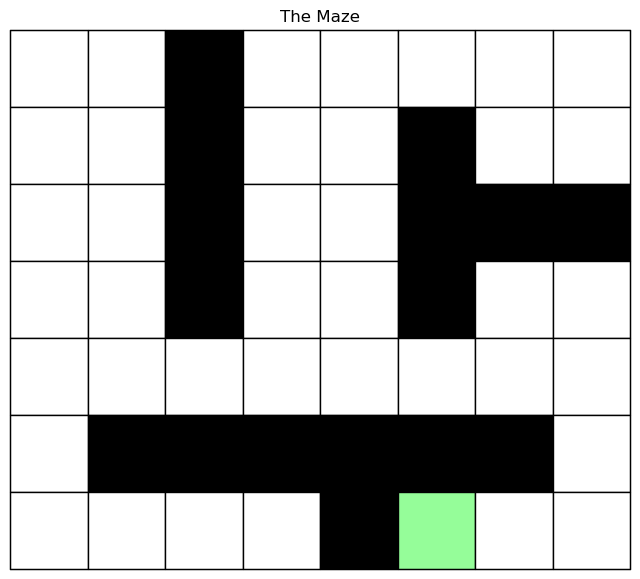

In [66]:
mz.draw_maze(maze)

In [78]:
# Create an environment maze
reload(mz)
env = mz.Maze(maze)

In [68]:
# Finite horizon
horizon = 20
# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming(env,horizon)

In [69]:
# Simulate the shortest path starting from position A
method = 'DynProg'
start  = ((0,0),(6,5))
death_count = 0
win_count = 0
other_count = 0
mean_time = 0
iter = 10000
for i in range(iter):
    path = env.simulate(start, policy, method)
    for t in range(len(path)):
        if path[t][0] == path[t][1]:
            death_count += 1
            break
        elif path[t][0] == (6,5):
            win_count += 1
            mean_time += t
            break
        elif t == len(path)-1:
            other_count += 1
            break

mean_time = mean_time/win_count
print("Death perc: " + str(death_count*(100/iter)) + "%")
print("Win perc: " + str(win_count*(100/iter)) + "%")
print("Other perc: " + str(other_count*(100/iter)) + "%")
print("Mean time: " + str(mean_time) + " steps")

Death perc: 0.0%
Win perc: 100.0%
Other perc: 0.0%
Mean time: 15.0 steps


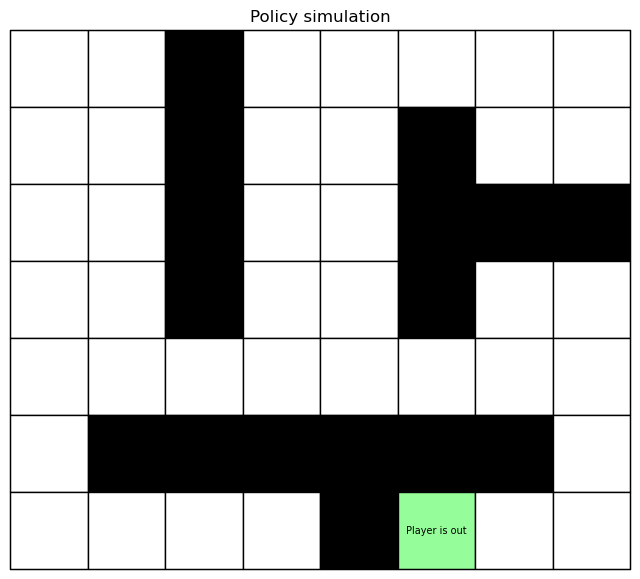

In [70]:
# Show the shortest path 
mz.animate_solution(maze, path)

### Point B: Value Iteration

In [100]:
# Create an environment maze
reload(mz)
env = mz.Maze(maze)

In [102]:
# Discount Factor 
p = 1/30
# Accuracy treshold 
epsilon = 0.001
V, policy = mz.value_iteration(env, p, epsilon)

In [106]:
# Simulate the shortest path starting from position A
method = 'ValIter'
start  = ((0,0),(6,5))
death_count = 0
win_count = 0
other_count = 0
mean_time = 0
iter = 10
for i in range(iter):
    path = env.simulate(start, policy, method)
    print(path)
    for t in range(len(path)):
        if path[t][0] == path[t][1]:
            death_count += 1
            break
        elif path[t][0] == (6,5):
            win_count += 1
            mean_time += t
            break
        elif t == len(path)-1:
            other_count += 1
            break

# mean_time = mean_time/win_count
print("Death perc: " + str(death_count*(100/iter)) + "%")
print("Win perc: " + str(win_count*(100/iter)) + "%")
print("Other perc: " + str(other_count*(100/iter)) + "%")
# print("Mean time: " + str(mean_time) + " steps")

[((0, 0), (6, 5)), ((0, 0), (6, 6)), ((0, 0), (6, 7)), ((0, 0), (6, 6)), ((0, 0), (5, 6)), ((0, 0), (5, 7)), ((0, 0), (4, 7)), ((0, 0), (5, 7)), ((0, 0), (4, 7)), ((0, 0), (3, 7)), ((0, 0), (2, 7)), ((0, 0), (1, 7)), ((0, 0), (0, 7)), ((0, 0), (0, 6)), ((0, 0), (0, 7))]
[((0, 0), (6, 5)), ((0, 0), (6, 6)), ((0, 0), (5, 6))]
[((0, 0), (6, 5)), ((0, 0), (6, 4))]
[((0, 0), (6, 5)), ((0, 0), (5, 5)), ((0, 0), (5, 6)), ((0, 0), (5, 7)), ((0, 0), (6, 7)), ((0, 0), (5, 7)), ((0, 0), (4, 7)), ((0, 0), (3, 7))]
[((0, 0), (6, 5)), ((0, 0), (5, 5)), ((0, 0), (6, 5)), ((0, 0), (5, 5)), ((0, 0), (5, 4)), ((0, 0), (5, 5)), ((0, 0), (5, 4)), ((0, 0), (5, 3)), ((0, 0), (5, 2)), ((0, 0), (5, 1)), ((0, 0), (5, 0)), ((0, 0), (5, 1)), ((0, 0), (5, 2)), ((0, 0), (5, 1)), ((0, 0), (6, 1)), ((0, 0), (6, 2)), ((0, 0), (5, 2)), ((0, 0), (4, 2)), ((0, 0), (3, 2)), ((0, 0), (3, 1)), ((0, 0), (3, 2)), ((0, 0), (4, 2)), ((0, 0), (4, 1)), ((0, 0), (4, 0)), ((0, 0), (5, 0)), ((0, 0), (5, 1)), ((0, 0), (6, 1)), ((0, 

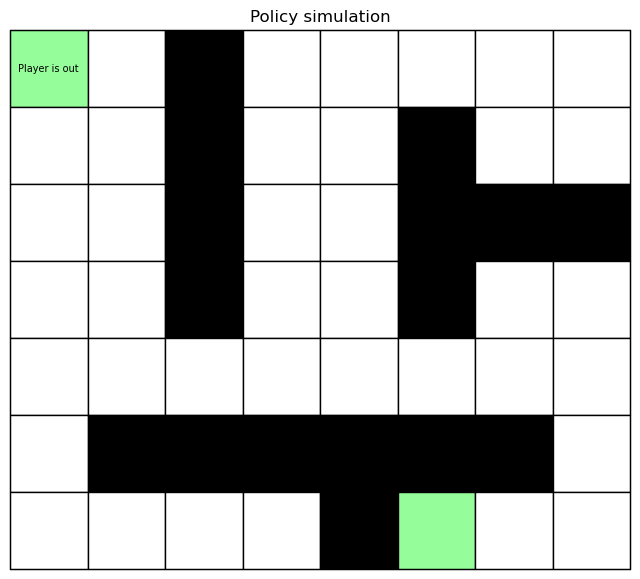

In [105]:
# Show the shortest path 
mz.animate_solution(maze, path)